<a href="https://colab.research.google.com/github/hildomaclean/Quinoa_RS-ML_Yields_Prediction/blob/main/Yield_quinoa_prediction_KRR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# requirements.txt

```
openpyxl
pandas
numpy
seaborn
matplotlib
scikit-learn
tqdm
```

In [ ]:
import sys
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install tqdm

# Downloading the dataset



In [ ]:
!wget -O dataset.zip  "https://www.dropbox.com/scl/fo/yf47rtpa1lg4b0niq59pm/ACgWLOYJMU9Lqfs84g7Opl4?rlkey=09nlygvjhh91gwwkohyl7r0pn&dl=1"
!unzip -o /content/dataset.zip -d /content/DATASET-QUINUA
!rm /content/dataset.zip


--2025-08-22 04:33:20--  https://www.dropbox.com/scl/fo/yf47rtpa1lg4b0niq59pm/ACgWLOYJMU9Lqfs84g7Opl4?rlkey=09nlygvjhh91gwwkohyl7r0pn&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc628514c917912bdc18801c324c.dl.dropboxusercontent.com/zip_download_get/CTRfr_gt8IErDAo33z4tvlsqzwPCu5zCzwUg-qV-ucNHKGaTfzpH0vZ-juiy_H6G31iNt9gubWelJl2Zv_X6ZhWY8Pp8uql3oFEXaKBSBcYiUw# [following]
--2025-08-22 04:33:21--  https://uc628514c917912bdc18801c324c.dl.dropboxusercontent.com/zip_download_get/CTRfr_gt8IErDAo33z4tvlsqzwPCu5zCzwUg-qV-ucNHKGaTfzpH0vZ-juiy_H6G31iNt9gubWelJl2Zv_X6ZhWY8Pp8uql3oFEXaKBSBcYiUw
Resolving uc628514c917912bdc18801c324c.dl.dropboxusercontent.com (uc628514c917912bdc18801c324c.dl.dropboxusercontent.com)... 162.125.2.15, 2620:100:6057:15::a27d:d0f
Connecting to uc628514c917912bdc18801c324c.dl.d

# Downloading and installing machine learning tools

In [ ]:
!rm -rf PythonMlTools
!git clone https://github.com/trucomanx/PythonMlTools.git

Cloning into 'PythonMlTools'...
remote: Enumerating objects: 780, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 780 (delta 59), reused 89 (delta 31), pack-reused 649 (from 1)
Receiving objects: 100% (780/780), 171.22 KiB | 1.27 MiB/s, done.
Resolving deltas: 100% (394/394), done.


In [ ]:
import sys
sys.path.append("PythonMlTools/src")

# Defining input variables

In [ ]:

Target_File='DATASET-QUINUA/Peso_Grano_Salida_VF.xlsx';

Input_Files=['DATASET-QUINUA/62DAP_Turpay_Final_250730.xlsx',
             'DATASET-QUINUA/86DAP_Turpay_Final_250730.xlsx',
             'DATASET-QUINUA/93DAP_Turpay_Final_250730.xlsx',
             'DATASET-QUINUA/121DAP_Turpay_Final_250730.xlsx',
             'DATASET-QUINUA/128DAP_Turpay_Final_250730.xlsx'];

Days=['62 DAP','86 DAP','93 DAP','121 DAP','128 DAP'];

Data_columns=['Canopy Cover(%)',
              'Red mean',
              'Green mean',
              'Blue mean',
              'RedEdge mean',
              'NIR mean',
              'DSM mean'
             ];
Target_columns=['Mean_Peso_grano','Stdev_Peso_grano'
               ];


# Preprocessing the input data

In [ ]:
import pandas as pd

def data_xlsx_to_numpy(FILENAME,COLUMNS):
    DATA=pd.read_excel(FILENAME);
    df=pd.DataFrame(DATA, columns=COLUMNS)
    return df.to_numpy();


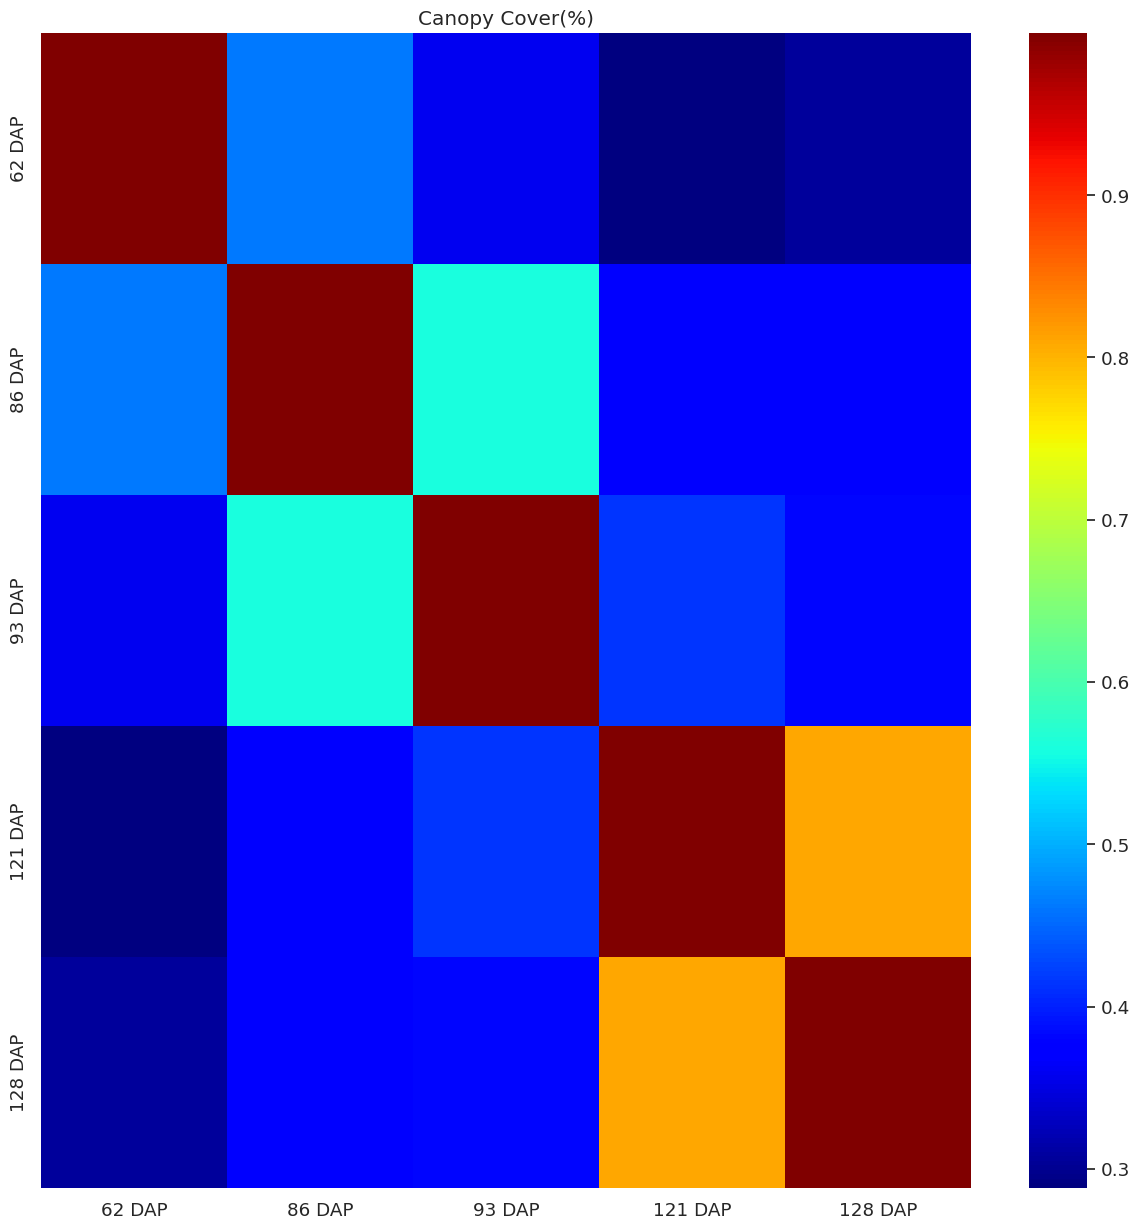

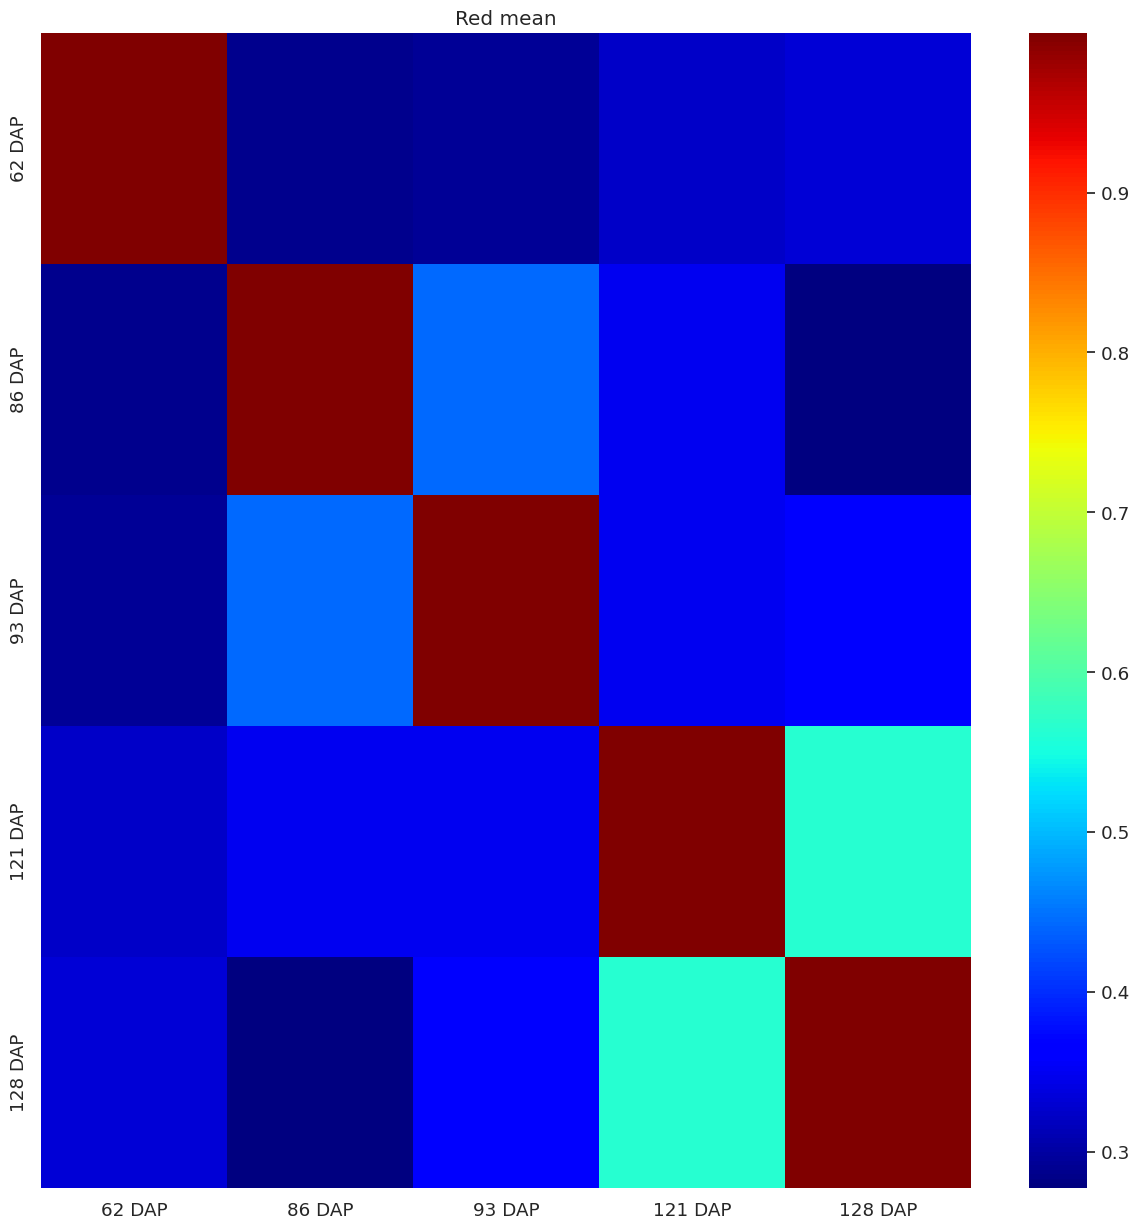

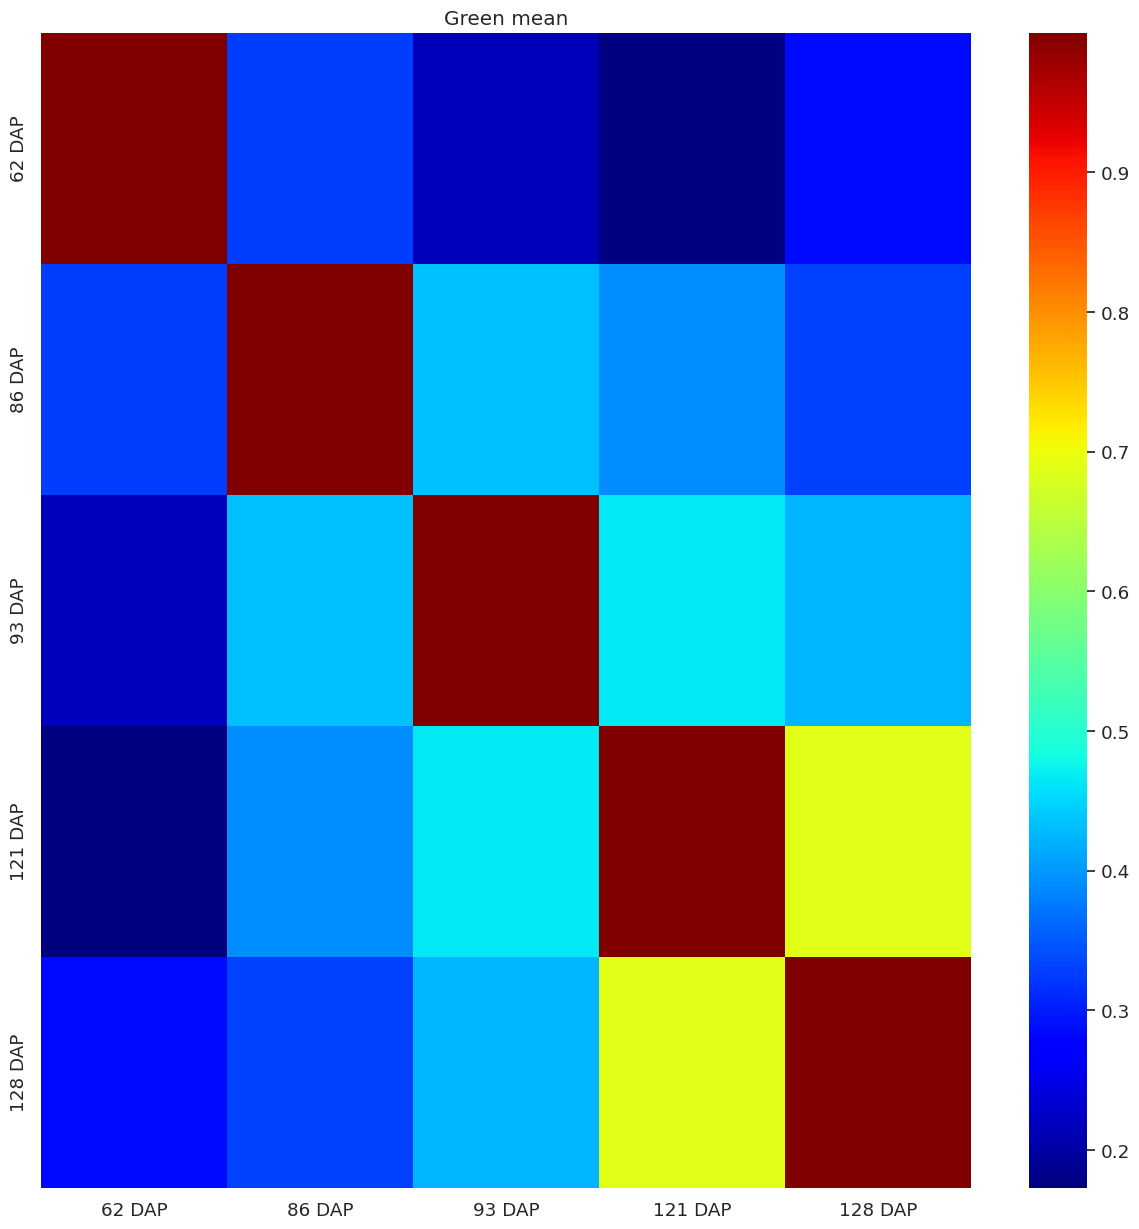

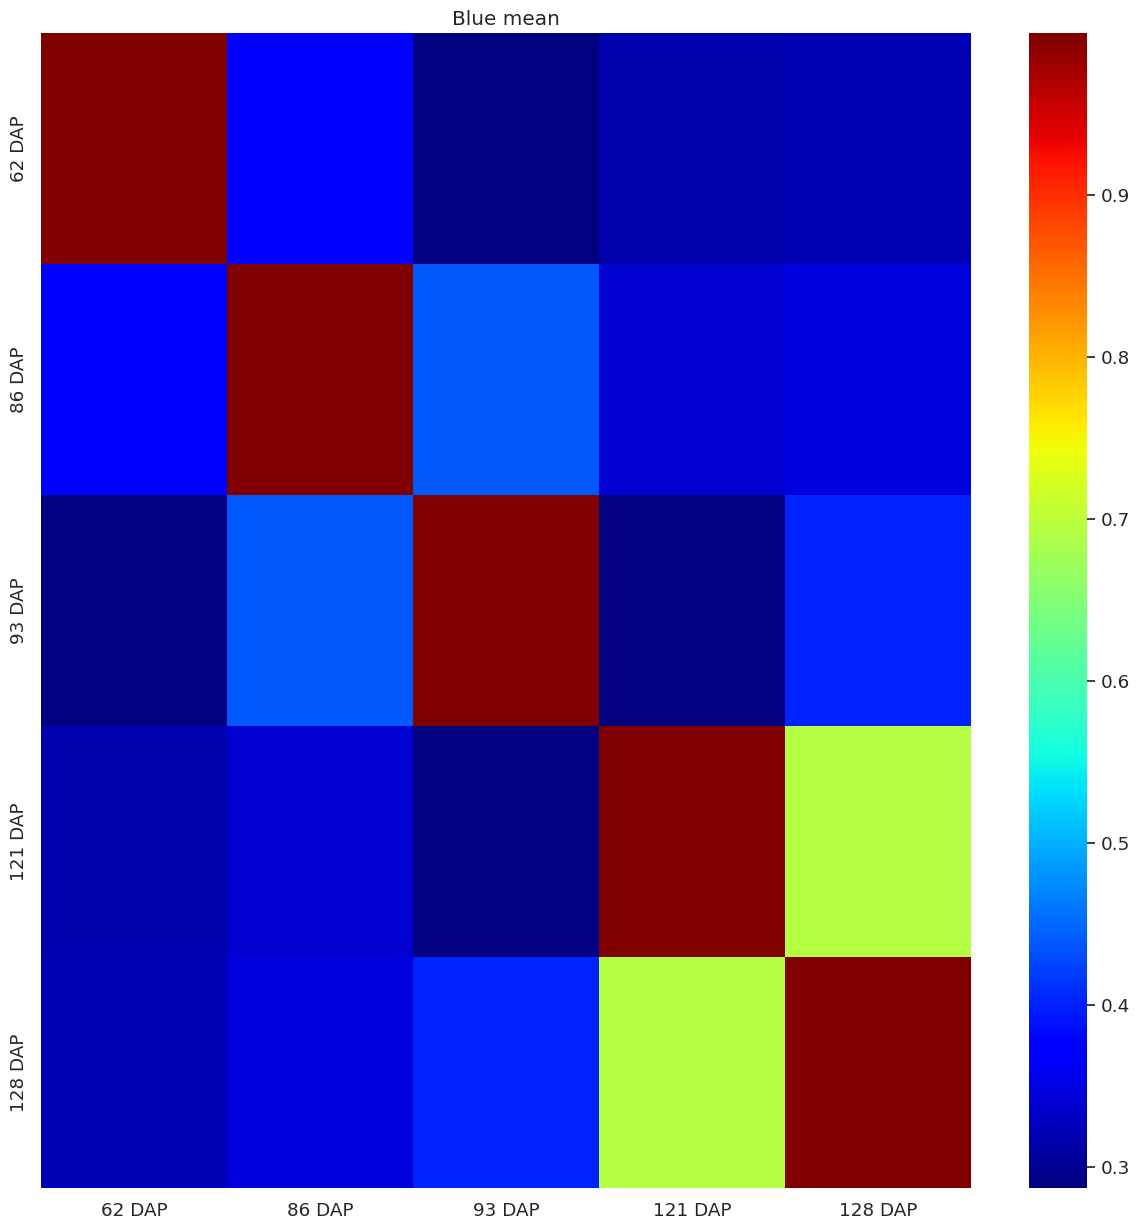

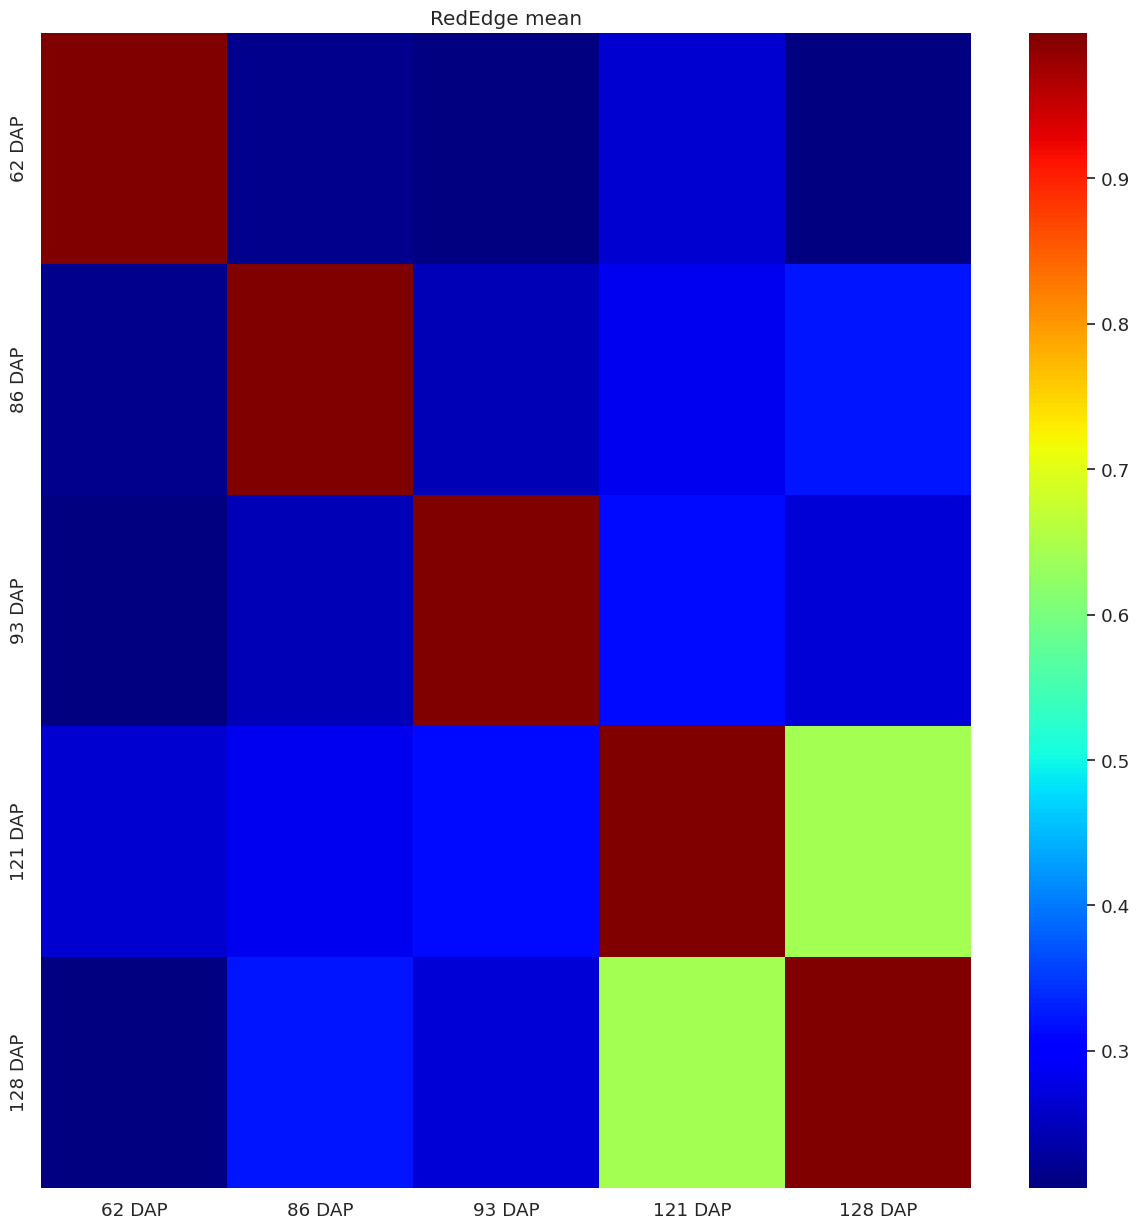

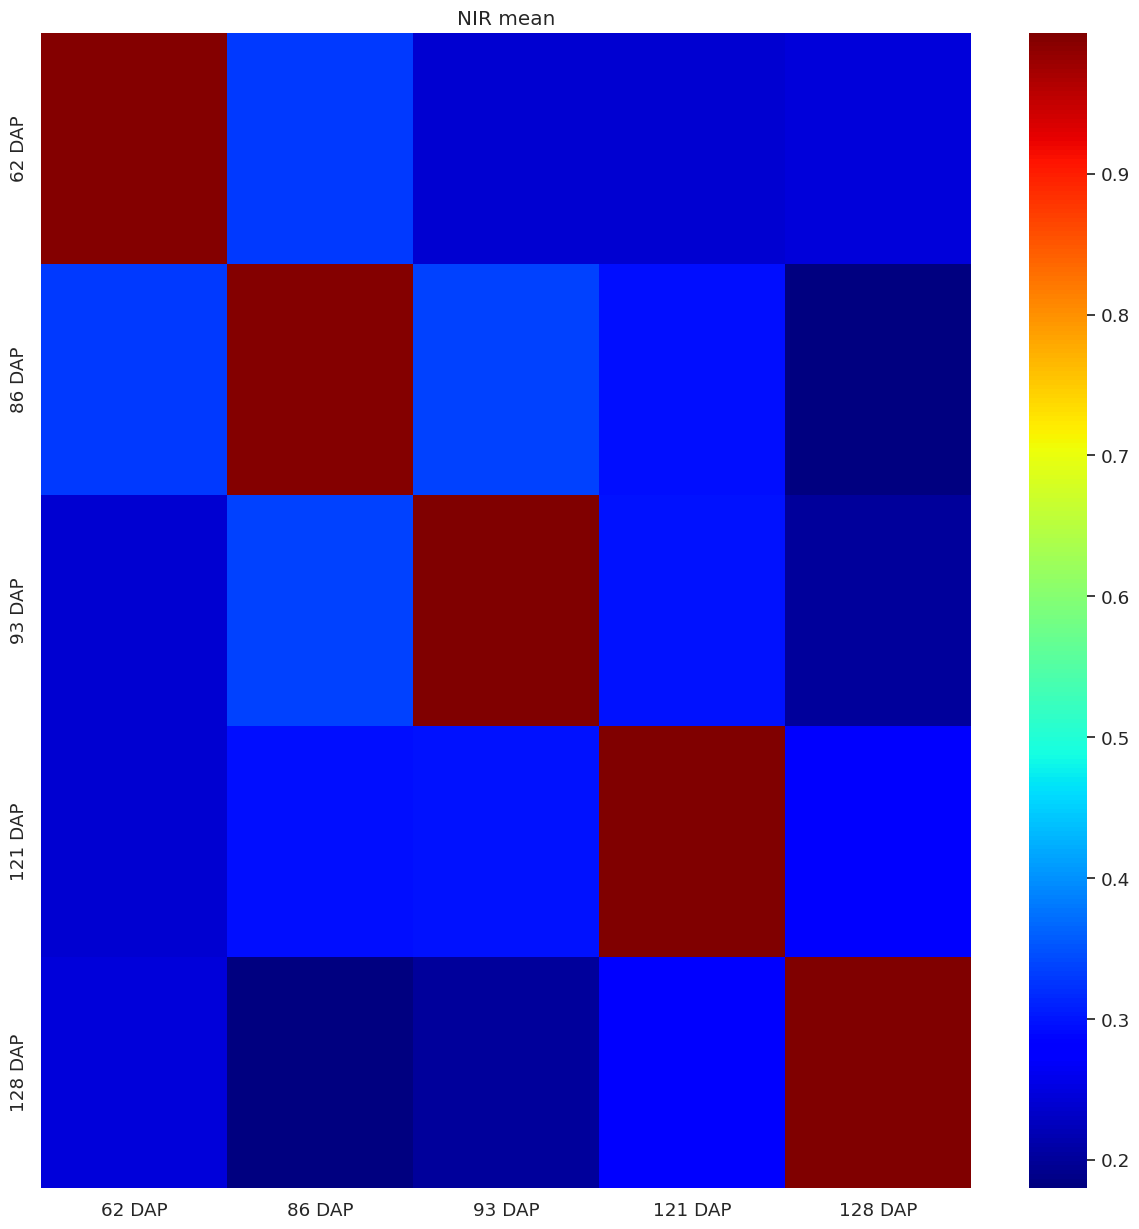

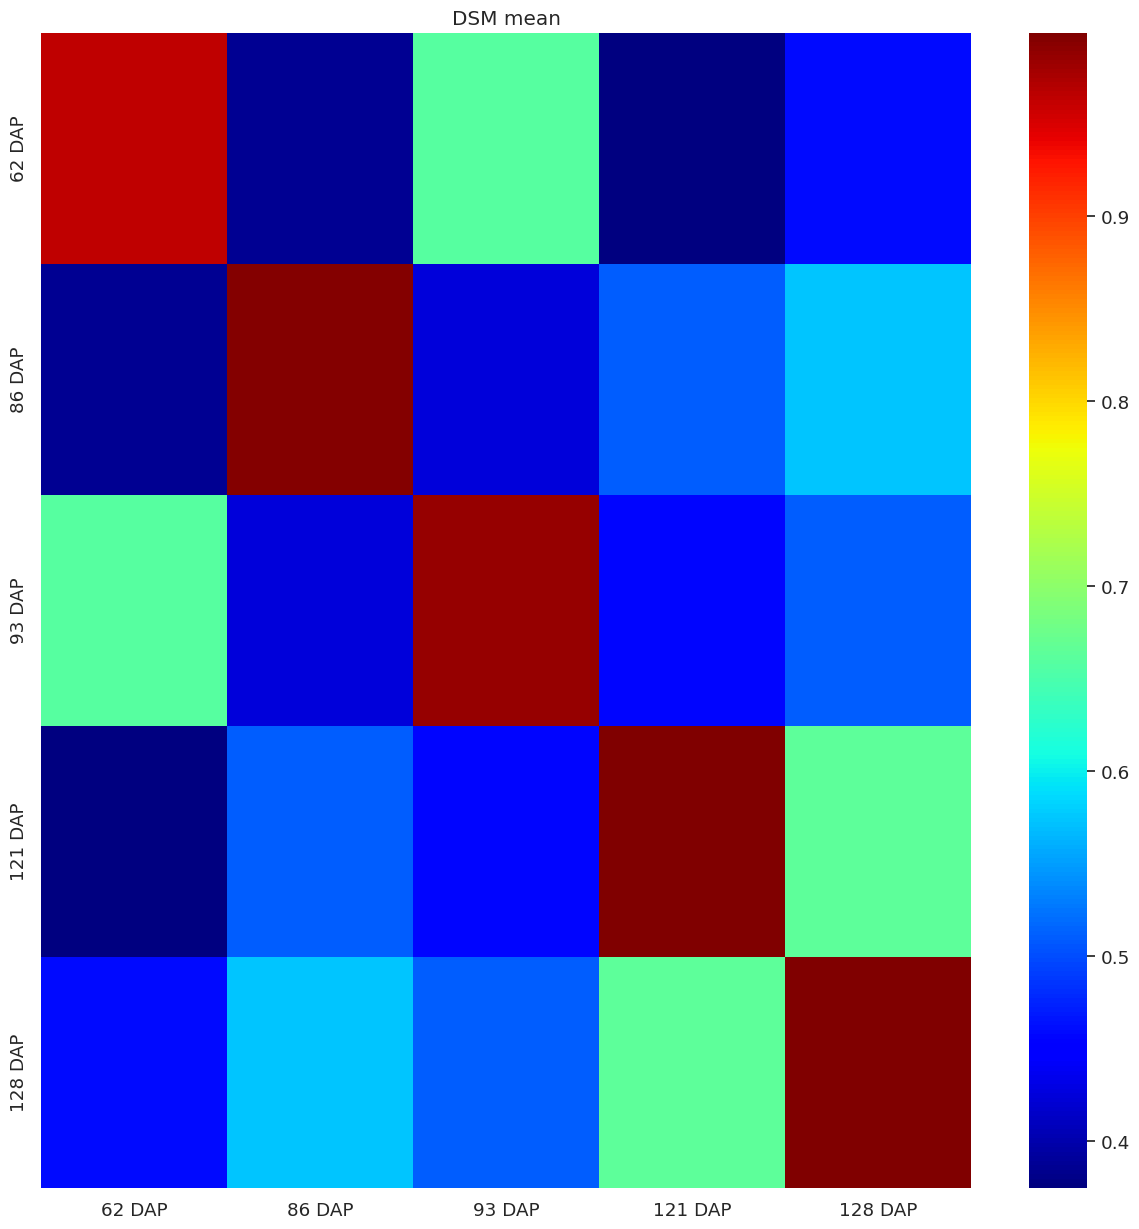

In [ ]:
import PythonMlTools.FeatureSelection.Analysis.Information as AnI
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
import os


BINS=10;

Y=data_xlsx_to_numpy(Target_File,Target_columns);

OUTDIR='OUTPUT';

OUTDIR_MUTINF_XvsX = os.path.join(OUTDIR,"MI_XvsX")
os.makedirs(OUTDIR_MUTINF_XvsX, exist_ok = True);


X_total=[]
for id in range(np.size(Input_Files)):
    X_total.append(data_xlsx_to_numpy(Input_Files[id],Data_columns));

mat_x_ALL=[]
for id_col in range(np.size(Data_columns)):
    in_vec=[]
    for day in range(len(X_total)):
        in_vec.append(X_total[day][:,id_col])
         #X_total[day][:,id_col] es un vector de 100 elementos

    matriz = np.column_stack(in_vec)

    mat_x=AnI.all_against_all_mutual_inf(matriz,bins=BINS,bandwidth=0.8/BINS);
    mat_x_ALL.append(mat_x)

    sns.set(font_scale=1.2)
    #plt.rcParams.update({'font.size': 14})

    # Plot information ratio in X: all against all
    fig = plt.figure(figsize=(15,15))
    sns.heatmap(mat_x,xticklabels=Days, yticklabels=Days,cmap='jet')
    plt.title(Data_columns[id_col])
    plt.show();

    filepath=os.path.join(OUTDIR_MUTINF_XvsX,'all_against_all_250730_'+Data_columns[id_col]+'.pdf')

    fig.savefig(filepath,dpi=300, bbox_inches='tight')
    print('\n')




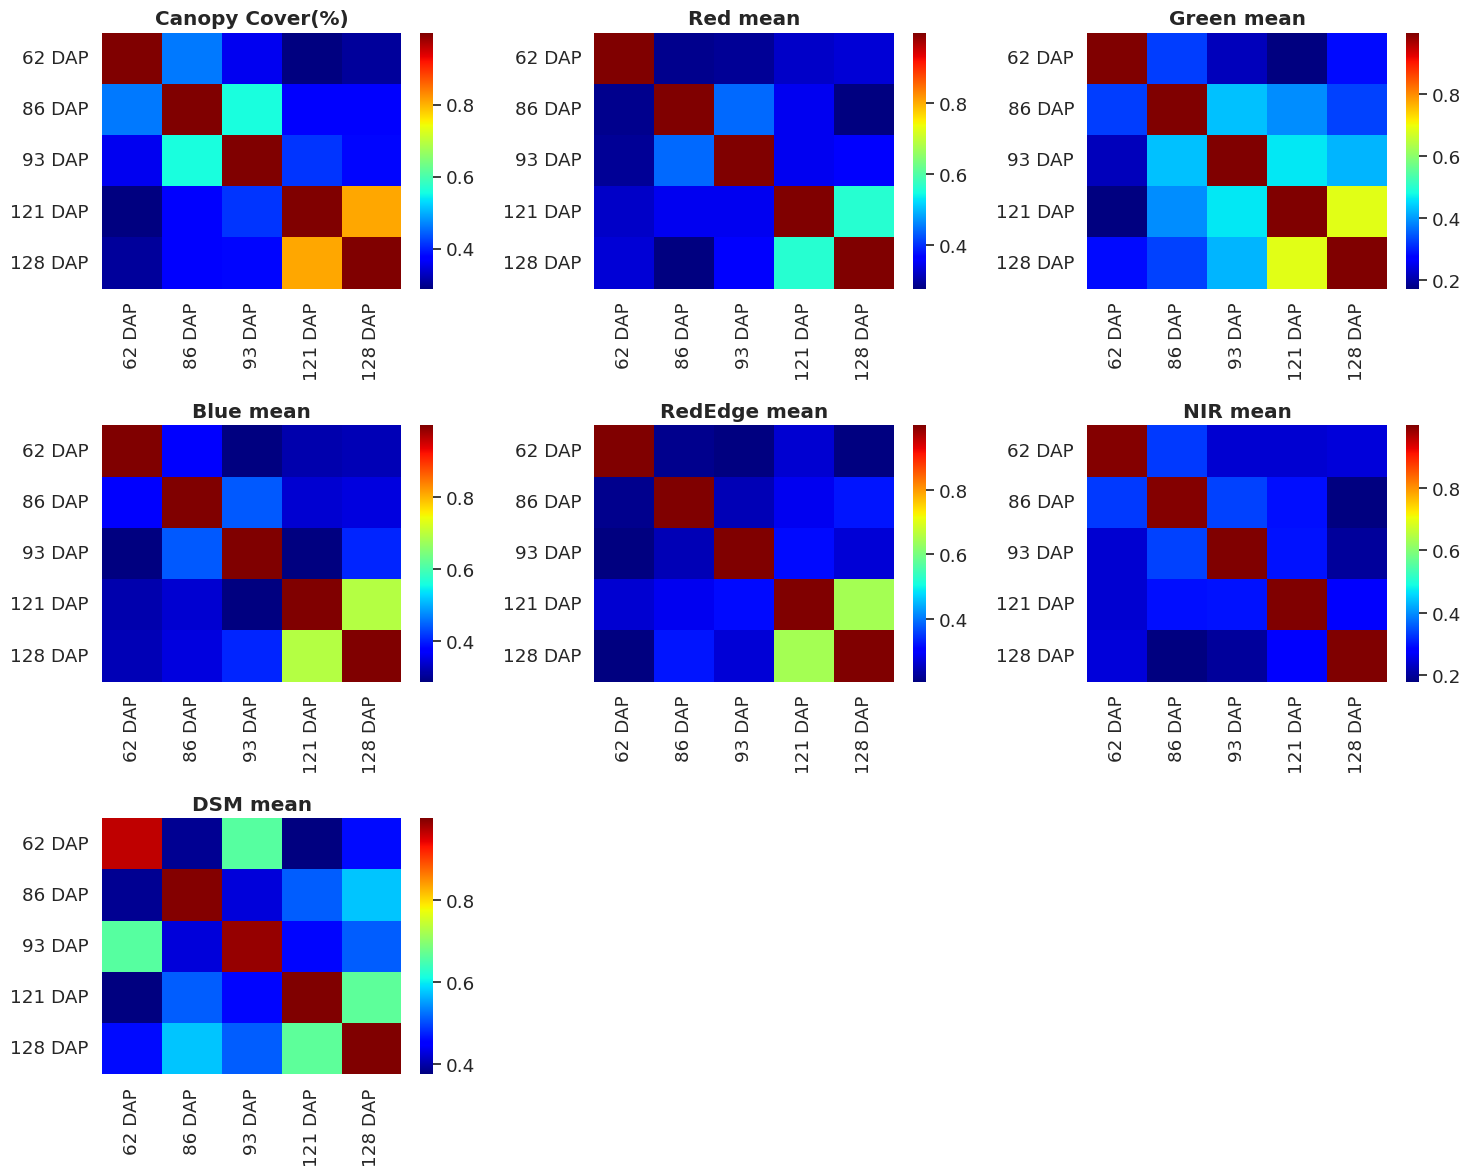

In [ ]:
sns.set(font_scale=1.2)

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
font_properties = font_manager.FontProperties(weight='bold')

axes = axes.flatten()  # transforma matriz 3x3 em lista de 9 eixos

for i, (mat, title) in enumerate(zip(mat_x_ALL, Data_columns)):
    ax = sns.heatmap(mat, xticklabels=Days, yticklabels=Days, cmap='jet', ax=axes[i])
    axes[i].set_title(title, fontweight='bold')

# Desligar os eixos "sobrando"
for j in range(len(mat_x_ALL), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

filepath=os.path.join(OUTDIR_MUTINF_XvsX,'All_X_against_X_250730.pdf')

fig.savefig(filepath,dpi=300, bbox_inches='tight')

# Plot mutual information - feature vs. feature (type) and feature vs. output

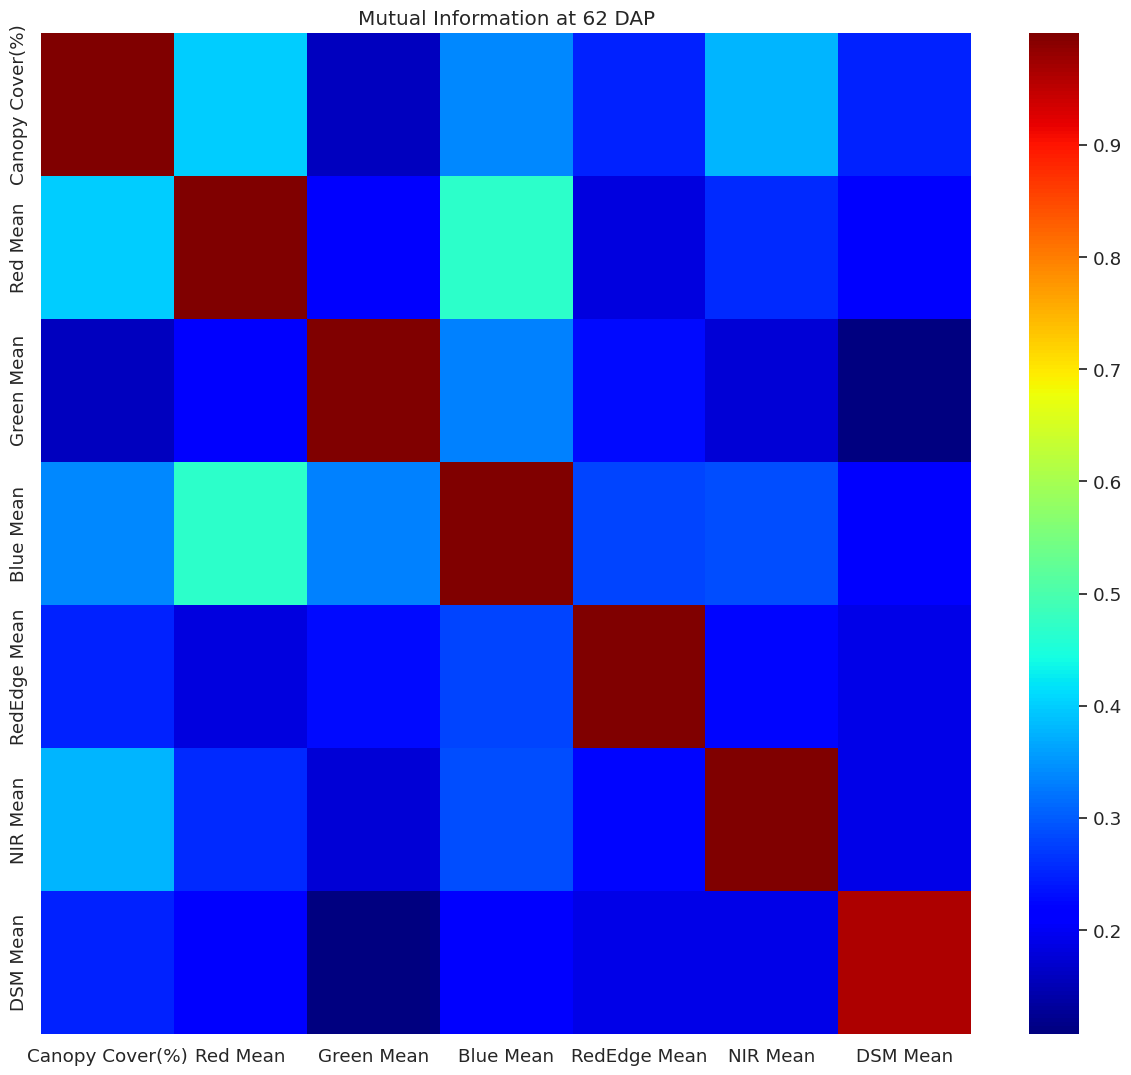

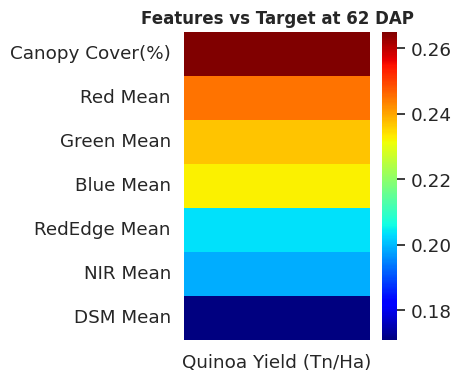

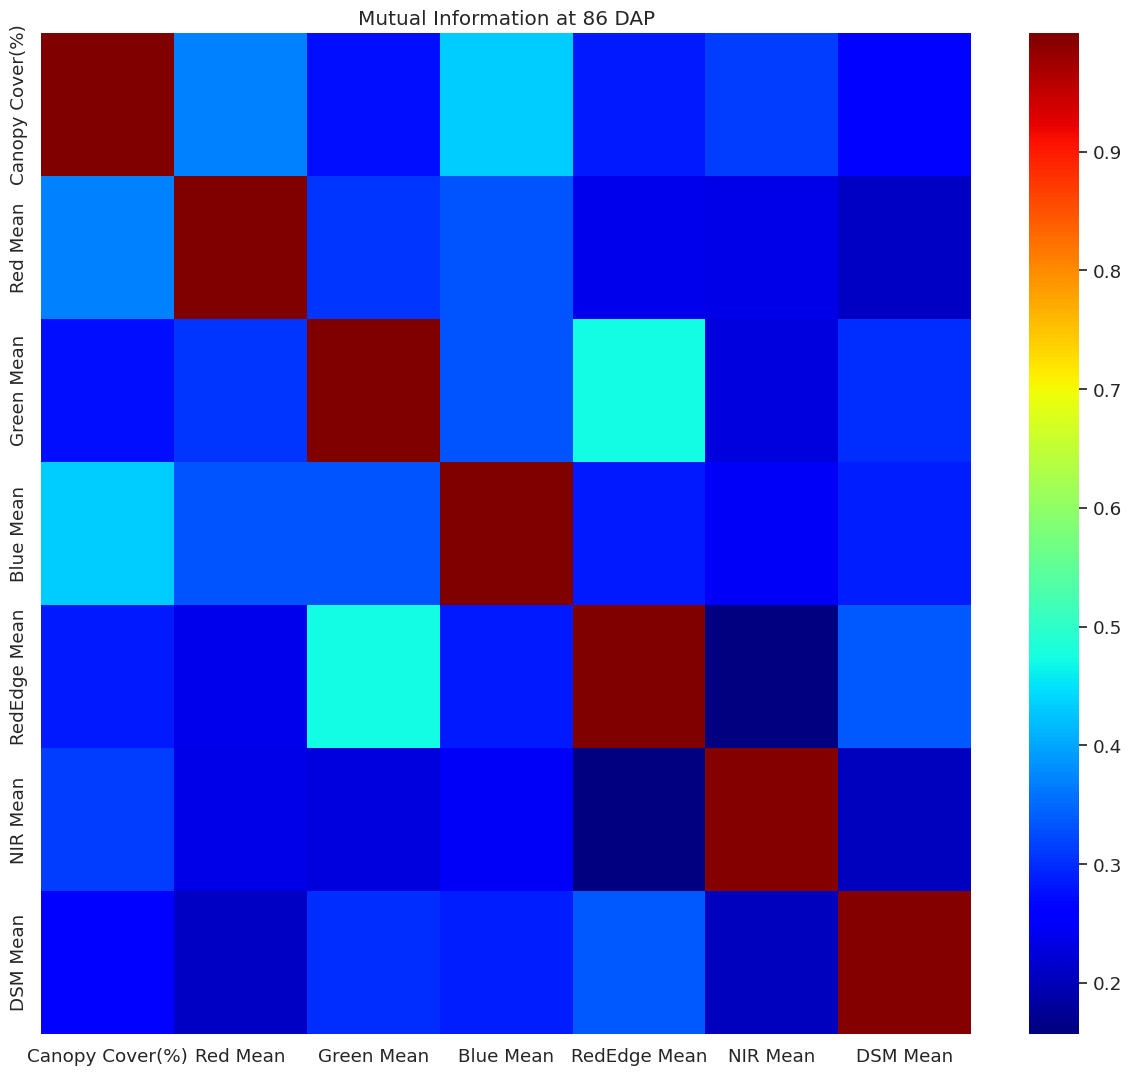

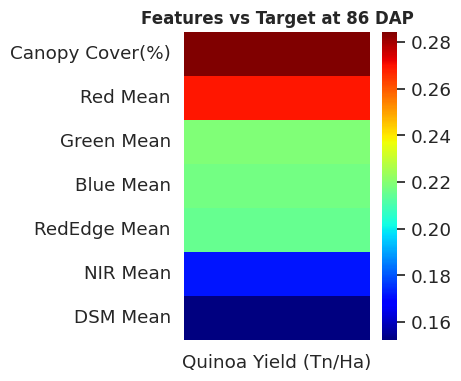

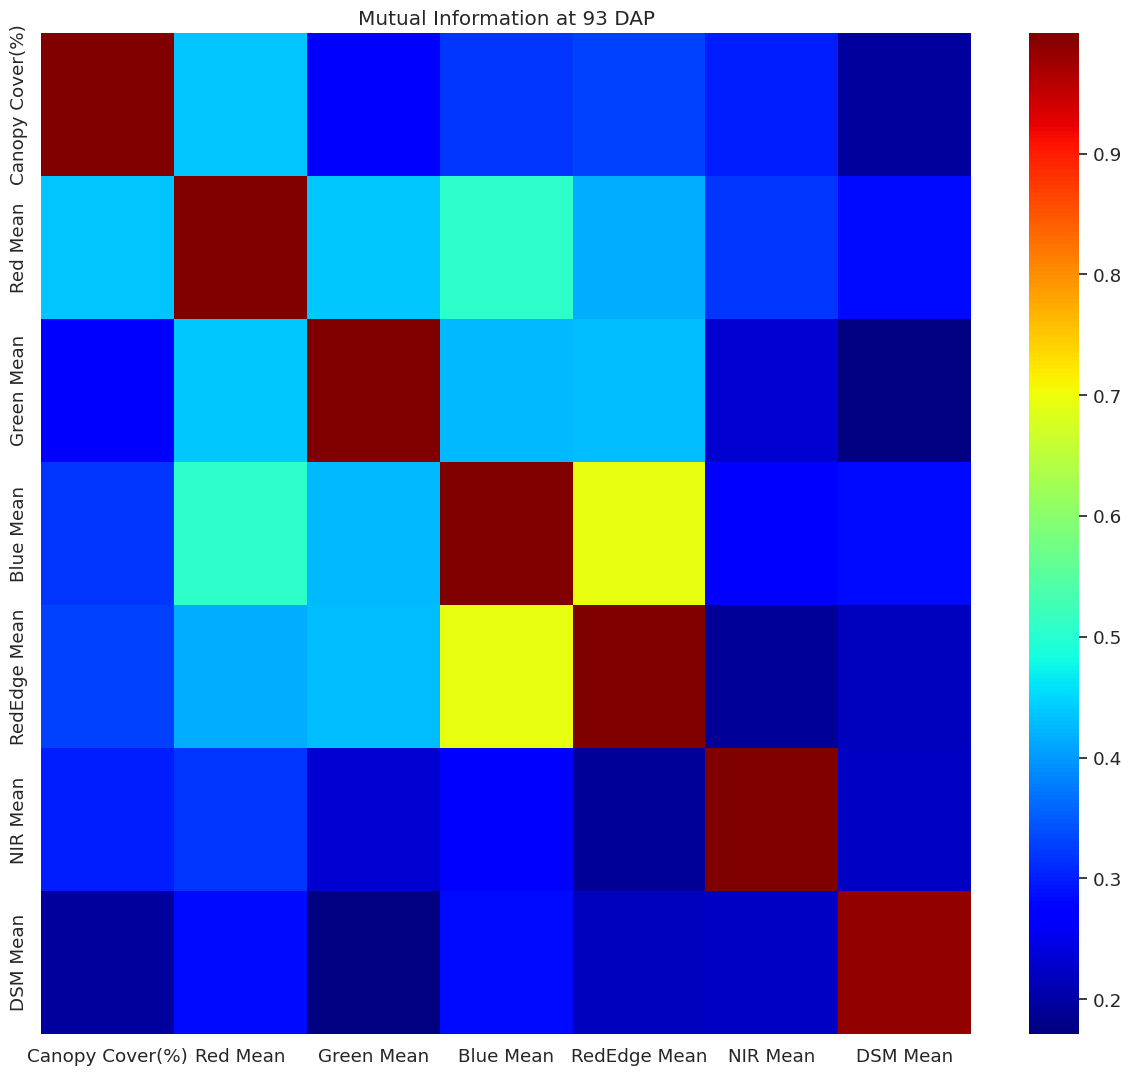

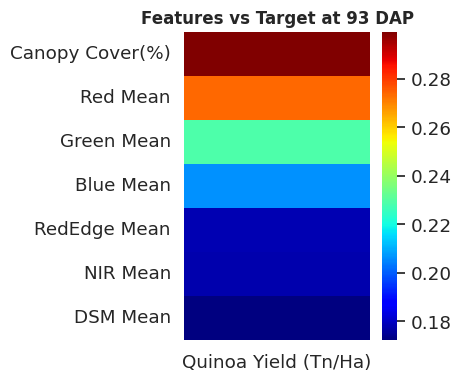

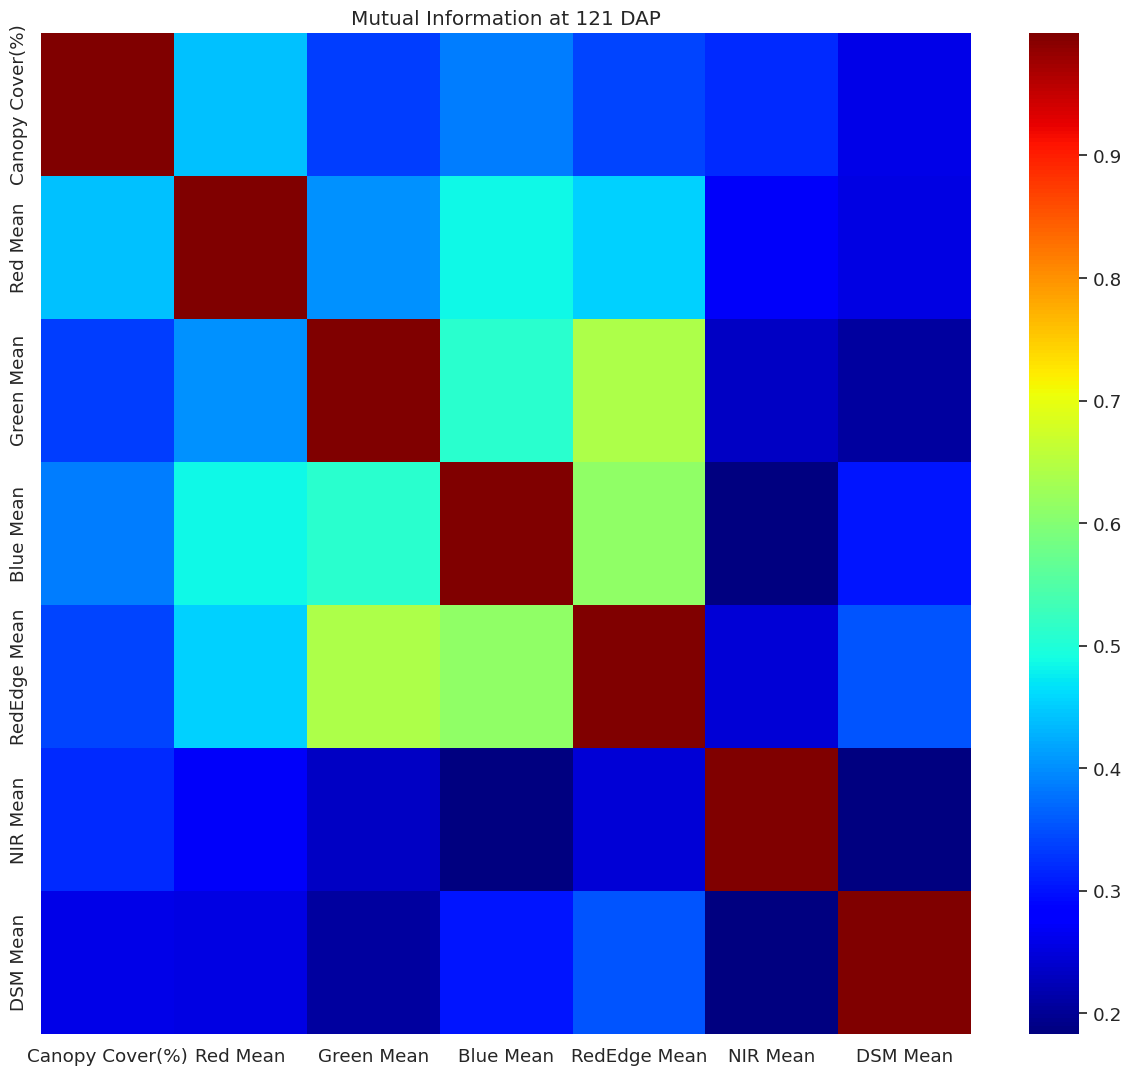

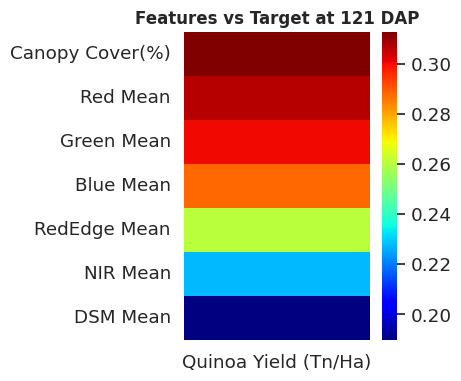

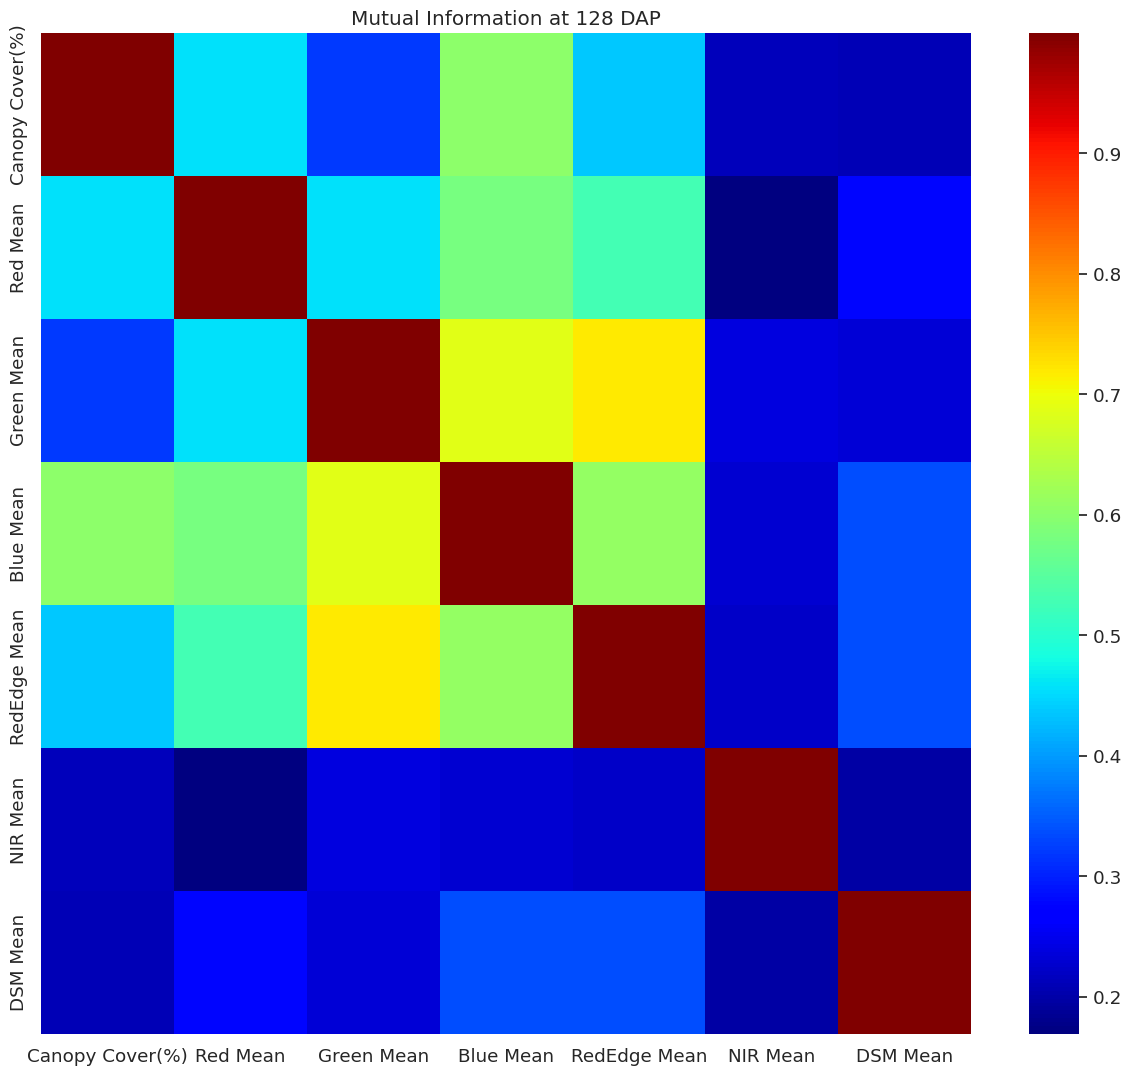

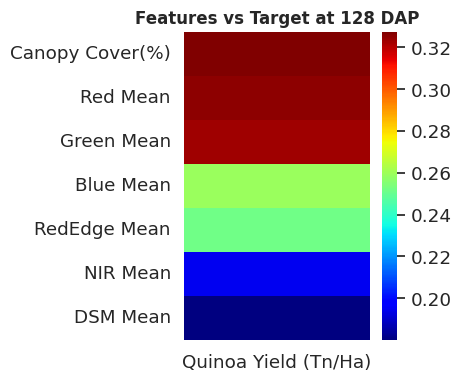

In [ ]:
import PythonMlTools.FeatureSelection.Analysis.Information as AnI
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np


BINS=10;
FEATURES=['Canopy Cover(%)', 'Red Mean', 'Green Mean', 'Blue Mean', 'RedEdge Mean', 'NIR Mean', 'DSM Mean']
#        ['Canopy Cover(%)', 'Red_Mean', 'Green_Mean', 'Blue_Mean', 'RedEdge_Mean', 'NIR_Mean', 'DSM_Mean']

Y=data_xlsx_to_numpy(Target_File,Target_columns);
#Y1=data_xlsx_to_numpy(Target_File,Target_columns_1);

OUTDIR=os.path.join("OUTPUT",'OUTPUT-INFO_FEATURES');
os.makedirs(OUTDIR, exist_ok = True);

for id in range(np.size(Input_Files)):
    X=data_xlsx_to_numpy(Input_Files[id],Data_columns);

    mat_x=AnI.all_against_all_mutual_inf(X,bins=BINS,bandwidth=0.8/BINS);
    mat_xy=AnI.x_against_y_mutual_inf(X,Y,bins=BINS,bandwidth=0.8/BINS);
    #mat_xy1=AnI.x_against_y_mutual_inf(X,Y1,bins=BINS,bandwidth=0.8/BINS);

    sns.set(font_scale=1.2)

    # Plot information ratio in X: all against all
    fig = plt.figure(figsize=(15,13))
    #sns.heatmap(mat_x,xticklabels=Data_columns, yticklabels=Data_columns,cmap='jet')

    ax = sns.heatmap(mat_x,xticklabels=FEATURES, yticklabels=FEATURES,cmap='jet')
    plt.title('Mutual Information at '+Days[id])
    plt.show();print('\n')
    filepath=os.path.join(OUTDIR,'all_against_all_'+Days[id]+'_250730.pdf')
    fig.savefig(filepath,dpi=300, bbox_inches='tight')

    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # horizontal

    ### saving files
    PRENAME = os.path.splitext(os.path.basename(Input_Files[id]))[0]
    np.savetxt(os.path.join(OUTDIR,PRENAME+'_information_feature_vs_feature.txt'),mat_x);
    filed = open(os.path.join(OUTDIR,PRENAME+'_labels_feature.txt'),'w');
    filed.writelines(s + '\n' for s in Data_columns)
    filed.close()
    ####

    Zdat = sorted(zip(mat_xy[:,0].tolist(),mat_xy[:,1].tolist(),Data_columns), reverse=True);
    DATA_COLUMNS_SORTED=[a for _,_,a in Zdat];
    Dat0_SORTED        =[a for a,_,_ in Zdat];
    Dat1_SORTED        =[a for _,a,_ in Zdat];
    mat_xy_SORTED = np.array((Dat0_SORTED,Dat1_SORTED)).T

    # Plot information ratio in X vs Y:
    fig = plt.figure(figsize=(3, 4)) # width and height in inches
    ax = sns.heatmap(mat_xy_SORTED[:,0].reshape(-1,1), xticklabels=['Quinoa Yield (Tn/Ha)'], yticklabels=FEATURES,cmap='jet')
    #nota: numpy necesita ayuda para definir las comunas.  resahpe(-1,1): con -1, coge todo lo que tenga en las filas y con 1 señala las columnas.

    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # horizontal

    plt.title('Features vs Target at '+Days[id], fontsize=12, fontweight='bold')
    plt.show();
    print('\n')
    filepath=os.path.join(OUTDIR,'X_against_Y_'+Days[id]+'_250730.pdf')
    fig.savefig(filepath,dpi=300, bbox_inches='tight')
    ###



    PRENAME = os.path.splitext(os.path.basename(Input_Files[id]))[0];
    #Extracts the filename without the extension (e.g., 'file1') using [0].
    np.savetxt(os.path.join(OUTDIR,PRENAME+'_information_feature_vs_target.txt'),mat_xy);
    filed = open(os.path.join(OUTDIR,PRENAME+'_labels_target.txt'),'w');
    filed.writelines(s + '\n' for s in Target_columns)
    filed.close()
    ###


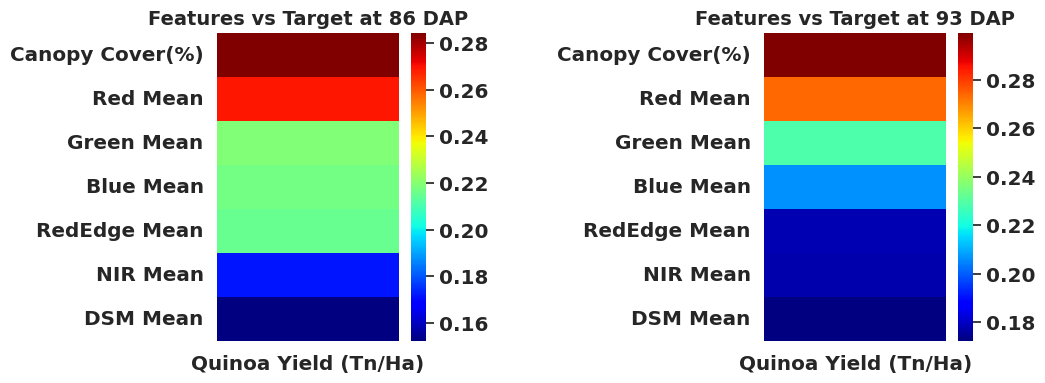

In [ ]:

# Plot information ratio in X vs Y for 86 and 93 DAP

X1=data_xlsx_to_numpy(Input_Files[1],Data_columns);
mat_xy1=AnI.x_against_y_mutual_inf(X1,Y,bins=BINS,bandwidth=0.8/BINS);
X2=data_xlsx_to_numpy(Input_Files[2],Data_columns);
mat_xy2=AnI.x_against_y_mutual_inf(X2,Y,bins=BINS,bandwidth=0.8/BINS);

Zdat1 = sorted(zip(mat_xy1[:,0].tolist(),mat_xy1[:,1].tolist(),Data_columns), reverse=True);
DATA_COLUMNS_SORTED=[a for _,_,a in Zdat1];
Dat0_SORTED        =[a for a,_,_ in Zdat1];
Dat1_SORTED        =[a for _,a,_ in Zdat1];
mat_xy_SORTED1 = np.array((Dat0_SORTED,Dat1_SORTED)).T

Zdat2 = sorted(zip(mat_xy2[:,0].tolist(),mat_xy2[:,1].tolist(),Data_columns), reverse=True);
DATA_COLUMNS_SORTED=[a for _,_,a in Zdat2];
Dat0_SORTED        =[a for a,_,_ in Zdat2];
Dat1_SORTED        =[a for _,a,_ in Zdat2];
mat_xy_SORTED2 = np.array((Dat0_SORTED,Dat1_SORTED)).T


#FEATURES=['Canopy Cover(%)', 'Red Mean', 'Green Mean', 'Blue Mean', 'RedEdge Mean', 'NIR Mean', 'DSM Mean']

fig = plt.figure(figsize=(10,4)) # width and height in inches
plt.subplot(1,3,1)
ax=sns.heatmap(mat_xy_SORTED1[:,0].reshape(-1,1), xticklabels=['Quinoa Yield (Tn/Ha)'], yticklabels=FEATURES,cmap='jet')
#nota: numpy necesita ayuda para definir las comunas.  resahpe(-1,1): con -1, coge todo lo que tenga en las filas y con 1 señala las columnas.

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # horizontal

# Establecer el estilo de la fuente para las etiquetas en negrita
font_properties = font_manager.FontProperties(weight='bold')

# Acceder al colorbar del heatmap
colorbar = ax.collections[0].colorbar

# Poner los números del colorbar en negrita
for label in colorbar.ax.get_yticklabels():
    label.set_fontproperties(font_properties)

# Poner las etiquetas del eje X en negrita
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontproperties=font_properties)
# Poner las etiquetas del eje Y en negrita
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontproperties=font_properties)
plt.title('Features vs Target at '+Days[1], fontsize=14, fontweight='bold')

plt.subplot(1,3,3)
ax=sns.heatmap( mat_xy_SORTED2[:,0].reshape(-1,1), xticklabels=['Quinoa Yield (Tn/Ha)'], yticklabels=FEATURES,cmap='jet')
#nota: numpy necesita ayuda para definir las comunas.  resahpe(-1,1): con -1, coge todo lo que tenga en las filas y con 1 señala las columnas.

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # horizontal

# Acceder al colorbar del heatmap
colorbar = ax.collections[0].colorbar

# Poner los números del colorbar en negrita
for label in colorbar.ax.get_yticklabels():
    label.set_fontproperties(font_properties)

# Poner las etiquetas del eje X en negrita
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontproperties=font_properties)
# Poner las etiquetas del eje Y en negrita
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontproperties=font_properties)

plt.title('Features vs Target at '+Days[2], fontsize=14, fontweight='bold')
plt.show();
print('\n')
filepath=os.path.join(OUTDIR,'X_against_Y_'+Days[1]+ Days[2]+'_250730.pdf')
fig.savefig(filepath,dpi=300, bbox_inches='tight')
###

86 DAP vs. 93 DAP


  0%|          | 0/200 [00:00<?, ?it/s]


R^2 train+val: 0.6137820030378556
 
alpha_opt:  0.0959770576832452 	gamma_opt: 0.01
 
R^2 is the coefficient of determination of the prediction. <-infty,1.0]
R^2 val  : 0.4813318315230634
R^2 test : 0.5966439849531558


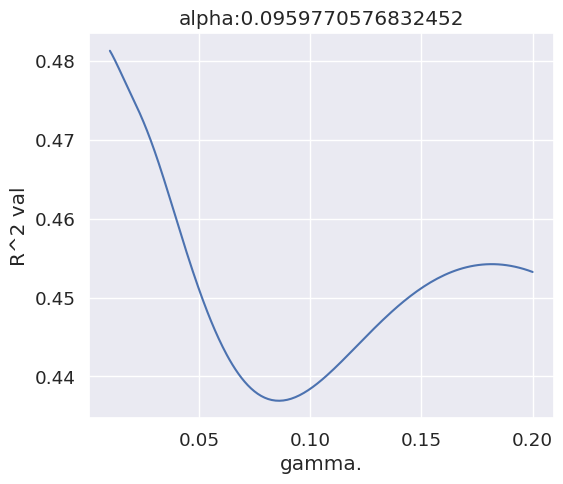

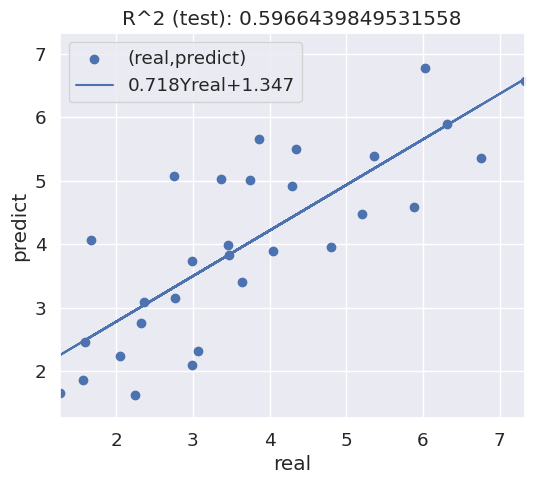

MAPE:	 0.27456854026897465
Pearsons correlation: 0.800


['OUTPUT/TIMES_HL/sklearn_KernelRidgeRegressionModel.pkl']

In [ ]:
#86_93_DAP

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import PythonMlTools.Regression.KernelRidgeGaussianKfold as KRG

OUTDIR=os.path.join( 'OUTPUT','TIMES_HL')
os.makedirs(OUTDIR, exist_ok = True);

Y=data_xlsx_to_numpy(Target_File,Target_columns);
scalerY = preprocessing.StandardScaler().fit(Y);
#StandardScaler es una clase de sklearn.preprocessing que se usa para escalar los datos a una distribución normal estándar, es decir,
#a una distribución con media 0 y desviación estándar 1. Esto es útil cuando los datos de entrada tienen diferentes escalas y quieres
#que todos los atributos tengan la misma escala. The formula for standardization is: Z= (x−μ)/σ

#The fit() method computes the mean (μ) and standard deviation (σ) of the dataset Y for later use in scaling.

Y_scaled = scalerY.transform(Y);
#Después de ajustar el escalador, usas .transform(Y) para transformar los datos Y a una escala estándar, es decir, para restar la media
#y dividir entre la desviación estándar que se calculó durante el ajuste.

alpha_list=np.geomspace(0.01,0.40,200);
gamma_list=np.geomspace(0.01,0.20,300);

#np.geomspace is a NumPy function that generates numbers spaced evenly on a logarithmic scale (geometric progression)
#This generates 300 numbers between 0.001 and 0.10 in geometric progression.
#The sequence starts at 0.001 and ends at 0.10, with values increasing multiplicatively.

R2_TEST2=[];

fd = open(os.path.join(OUTDIR,'Salida-Opt_86_DAP_93.csv'), "w")
fd.write('TIME,R2,MAPE\n');
fd.close()

# Geting matrix
X0=data_xlsx_to_numpy(Input_Files[1],Data_columns);
X1=data_xlsx_to_numpy(Input_Files[2],Data_columns);
X=np.concatenate((X0,X1), axis=1);

scalerX = preprocessing.StandardScaler().fit(X);
X_scaled = scalerX.transform(X);

IDX=0;

# Criando categorias com base na primeira coluna de Y_scaled
num_bins = 8
bins = np.linspace(-0.1 + np.min(Y_scaled[:,IDX]),0.1 + np.max(Y_scaled[:,IDX]), num_bins + 1)
y_binned = np.digitize(Y_scaled[:, IDX], bins)

#print(bins)
#print(Y_scaled)
#print(y_binned)


X_train, X_test, y_train, y_test = train_test_split( X_scaled, Y_scaled, test_size=0.30, random_state=42,stratify=y_binned);
#split your dataset into training and testing sets.
# test_size=0.30:Specifies the proportion of the dataset to include in the testing set. Here, 30% of the data
# will be used for testing, and the remaining 70% will be used for training.
# random_state=42: Ensures reproducibility. Setting a fixed random seed (42 in this case) ensures that the split will be the same every time you run the code.

print(Days[1],"vs.",Days[2])

krr_opt, alpha_opt, gamma_opt, score_val_opt, SCORE_AG = KRG.FuncKernelRidgeKfoldBestGaussian(  alpha_list,
                                                                                                gamma_list,
                                                                                                X_train, y_train[:,IDX],
                                                                                                K=3);
# y_train[:,IDX]: It is used to extract a specific column (or columns) from a 2D NumPy array or a similar data structure
mean_y = scalerY.mean_[IDX];
std_y  = np.sqrt(scalerY.var_[IDX]);

R2_val, R2_test, MAPE = KRG.FuncPlotDataKfold( krr_opt,
                                                  alpha_opt,
                                                  gamma_opt,
                                                  score_val_opt,
                                                  mean_y,std_y,
                                                  gamma_list,
                                                  X_test, y_test[:,IDX]);

fd = open(os.path.join(OUTDIR,'Salida-Opt_86_DAP_93.csv'), "a")
fd.write(Days[1]+' '+Days[2]+','+str(R2_test)+','+str(MAPE)+'\n');
fd.close()

import joblib

joblib.dump(krr_opt,os.path.join(OUTDIR,'sklearn_KernelRidgeRegressionModel.pkl'))


 
alpha_opt:  0.0959770576832452 	gamma_opt: 0.01
 
R^2 is the coefficient of determination of the prediction. <-infty,1.0]
R^2 val  : 0.4813318315230634
R^2 test : 0.5966439849531558
(30,)
(70,)
(30,)
(70,)
Coeficiente angular (pendiente): 0.7175848738372957
Intercepto: 1.346612920604675
Coeficiente angular (pendiente): 0.7175848738372957
Intercepto: 1.346612920604675


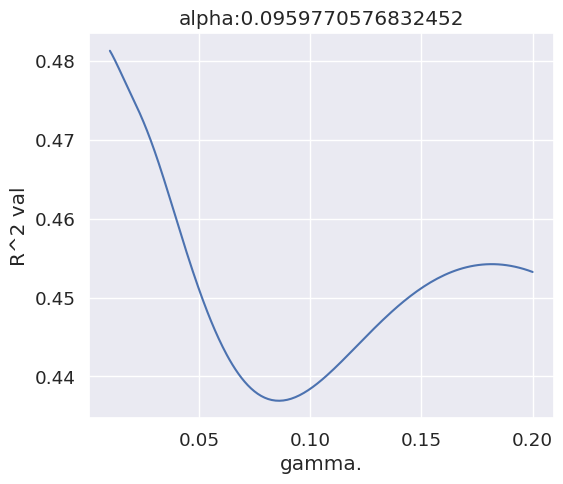

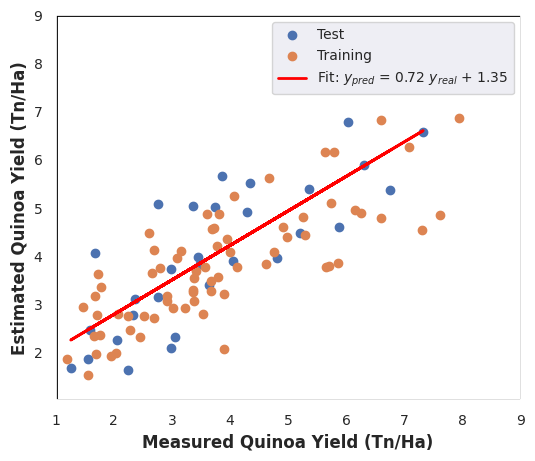

MAPE:	 0.27456854026897465


In [ ]:

import matplotlib.pyplot as plot
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression


OUTPUT='OUTPUT'

def FuncPlotDataKfold_2(    krr_opt,
                            alpha_opt,
                            gamma_opt,
                            score_val_opt,
                            mean_y,std_y,
                            gamma_list,
                            X_test, y_test, X_train, y_train):

    plot.figure(figsize=(6, 5))
    plot.plot(gamma_list, score_val_opt);
    plot.xlabel('gamma.');
    plot.ylabel('R^2 val');
    plot.title("alpha:"+str(alpha_opt))

    print(" ")
    print("alpha_opt: ",alpha_opt,"\tgamma_opt:",gamma_opt);
    print(" ")

    R2_val=np.max(score_val_opt);
    R2_test=krr_opt.score(X_test, y_test);
    print("R^2 is the coefficient of determination of the prediction. <-infty,1.0]")
    print("R^2 val  :", R2_val)
    print("R^2 test :", R2_test)

    #################################
    Ypred_train=std_y*krr_opt.predict(X_train)+mean_y;
    Yreal_train=std_y*y_train+mean_y;




    Ypred=std_y*krr_opt.predict(X_test)+mean_y;
    Yreal=std_y*y_test+mean_y;

    #Yreal_ALL=td_y*Y_scaled+mean_y;

    print(Yreal.shape)
    print(Yreal_train.shape)
    print(Ypred.shape)
    print(Ypred_train.shape)

    ab = np.vstack([Yreal.reshape(-1,1), Yreal_train.reshape(-1,1)])
    cd = np.vstack([Ypred.reshape(-1,1), Ypred_train.reshape(-1,1)])
    res = np.hstack([ab, cd])
    filepath = os.path.join(OUTPUT,"Datos_Predichos_86_93DAP.csv")
    np.savetxt(filepath, res, delimiter=",", fmt="%f", header="Medido,Predicho", comments='')

    plot.figure(figsize=(6, 5));
    plot.scatter(Yreal,Ypred,label='Test');
    plot.scatter(Yreal_train,Ypred_train,label='Training');

    model = LinearRegression()
    model.fit(Yreal.reshape(-1,1), Ypred)

    Yreal_normalizado=np.array(Yreal).reshape(-1,1)
    y1_pred=model.predict(Yreal_normalizado);

    plot.plot(Yreal, y1_pred, color='red',
              linewidth=2,
              label=f'Fit: $y_{{pred}}$ = {model.coef_[0]:.2f} $y_{{real}}$ + {model.intercept_:.2f}')



    slope = model.coef_[0]
    intercept = model.intercept_
    print(f"Coeficiente angular (pendiente): {slope}")
    print(f"Intercepto: {intercept}")

    # Cambiar el fondo de la figura (el área que rodea los ejes)
    #plot.gcf().patch.set_facecolor('lightblue')  # Fondo de la figura
    # Cambiar el fondo de los ejes)
    #plt.gca().set_facecolor('whitesmoke')

    # Definir los rangos de los ejes
    plot.xlim(1, 9)
    plot.ylim(1, 9)

    #plot.plot(Yreal_normalizado, y1_pred, color='red', linewidth=2, label=f'Linear Regression Fit: Y = {slope:.2f}X + {intercept:.2f}')
    plot.xlabel('Measured Quinoa Yield (Tn/Ha)',fontsize=12,fontweight='bold');
    plot.ylabel('Estimated Quinoa Yield (Tn/Ha)',fontsize=12,fontweight='bold');

    #plot.title('Quinoa Yield')
    #plot.title('R^2 (test): '+str(R2_test))
    plot.legend(fontsize=10)
    #plot.tick_params(axis='both', which='major', labelsize=10)  # Ticks

    plot.xticks([1,2,3,4,5,6,7,8,9], fontsize=10)
    plot.yticks([2,3,4,5,6,7,8,9], fontsize=10)

    plot.grid(False)
    #plt.grid(True, color='gray', linestyle='--', linewidth=0.25)  # Personalizar la grilla

    # Establecer el fondo blanco de la figura y los ejes
    plt.gcf().set_facecolor('white')  # Fondo blanco para toda la figura
    plt.gca().set_facecolor('white')  # Fondo blanco para los ejes
    #plot.gca().spines['top'].set_visible(True)
    #plot.gca().spines['right'].set_visible(True)

    # Imprimimos los coeficientes
    print(f"Coeficiente angular (pendiente): {slope}")
    print(f"Intercepto: {intercept}")

    # Asegurarse de que los ejes estén visibles
    plot.axhline(1, color='black',linewidth=2)  # Línea horizontal en Y=0
    plot.axvline(1, color='black',linewidth=2)  # Línea vertical en X=0
    plot.axhline(9, color='black',linewidth=2)  # Línea horizontal en Y=0
    plot.axvline(9, color='black',linewidth=2)  # Línea vertical en X=0

    #plot.savefig('Quinoa Yields.pdf',dpi=300, bbox_inches='tight',transparent=True)
    filepath = os.path.join(OUTPUT,'Quinoa Yields_86_93DAP.pdf')
    plot.savefig(filepath, bbox_inches='tight', dpi=300,transparent=True)
    plot.show()


    MAPE=mean_absolute_percentage_error(Yreal,Ypred);
    print("MAPE:\t",MAPE)

    return R2_val, R2_test, MAPE;



R2_val, R2_test, MAPE = FuncPlotDataKfold_2( krr_opt,
                                                  alpha_opt,
                                                  gamma_opt,
                                                  score_val_opt,
                                                  mean_y,std_y,
                                                  gamma_list,
                                                  X_test, y_test[:,IDX],X_train, y_train[:,IDX]);

